# The first Villain: overfitting

Overfitting can not only happen with linear models. Overfitting has many faces. Overfitting is always ready to ruin your attempt to train predictive models.

Here we will look at some examples of overfitting, so that you easily spot it in the future.

## Inreasing model complexity with poliyomials

Let's import necessary packages, and load our dataset again.
This time we will randomly sample 50 participants from our example dataset and plot age versus the volume of another region: the right middle temporal gyrus.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.formula.api as smf

<AxesSubplot:xlabel='Age', ylabel='rh_superiorparietal_volume'>

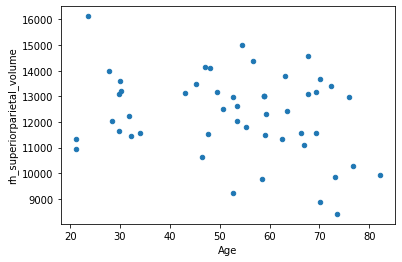

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/pni-lab/predmod_lecture/master/ex_data/IXI/ixi.csv").sample(n=50, random_state=1)
df.plot.scatter(y='rh_superiorparietal_volume', x='Age')

Now use the linear modelling framework to fit so-called nth order polynomial (i.e. the powers of the predictor up to the degree n) models.

In [3]:
poly_model_1 = smf.ols('rh_middletemporal_volume ~ Age', df).fit()
poly_model_2 = smf.ols('rh_middletemporal_volume ~ -1 + np.vander(Age, 3, increasing=True)', df).fit()
poly_model_3 = smf.ols('rh_middletemporal_volume ~ -1 + np.vander(Age, 5, increasing=True)', df).fit()
poly_model_10 = smf.ols('rh_middletemporal_volume ~ -1 + np.vander(Age, 10, increasing=True)', df).fit()

<AxesSubplot:xlabel='Age', ylabel='rh_middletemporal_volume'>

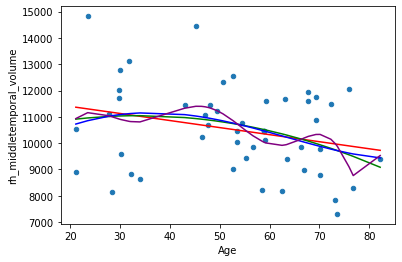

In [4]:
df.plot.scatter(x='Age', y='rh_middletemporal_volume')
sns.lineplot(x=df['Age'], y=poly_model_1.predict(df), color='red')
sns.lineplot(x=df['Age'], y=poly_model_2.predict(df), color='green')
sns.lineplot(x=df['Age'], y=poly_model_3.predict(df), color='blue')
sns.lineplot(x=df['Age'], y=poly_model_10.predict(df), color='purple')

:::{seealso}
Note that this time we used another package for plotting: `seaborn`. With seaborn it is very simple to create nice visualizations of `pandas` dataframes.
As many other pythin packages, seaborn, too, has an excellent [documentation](https://seaborn.pydata.org/) and a very active community.
:::


:::{admonition} Excercise 3.1
:class: tip, dropdown
Which number of polynomials seems to be reasonable to you?
Maybe it gets clearer if you increase the sample size (when reading in the data)?
Try it out in Colab!
:::

Using polynomials of the orginal variable can be useful. Adding e.g. the squared of a pradictor makes linear models able to capture non-linear (squared) relationships, e.g. U-shaped associations. But the higher the number of polynomials, the more complex the model is and the more capacity it has to overfit your data. At a small sample size, even a 2nd order polynomial regression might already overfit. This is a very common type of model overfitting.

## Google Flu Trends

Google searches become part of our life (and Google will be most probably your friend during solving the exercises in this book).
Google of course collects all these data and, in 2008, tried to exploit this rich database in order to predict the severity of the upcoming influenza season.
They published the idea and called it Google Flu Trends (GFT).
But then GFT failed - and failed spectacularly {cite:p}`butler2013google` - missing at the peak of the 2013 U.S. flu season by 140 percent.

It turned out that GFT was quite prone to overfit to seasonal terms unrelated to the flu, like “high school basketball”.

Of course, related approaches are now revised and perform significantly better.
But the big fail of GFT remains a very illustrative example of how overfitting can be detrimental on predictive models.


:::{seealso}
Read more [here](https://www.wired.com/2015/10/can-learn-epic-failure-google-flu-trends/).
:::

## Ptolemaic model of the solar system

The [Ptolemaic astronomic model](https://en.wikipedia.org/wiki/Geocentric_model#Ptolemaic_model) postulates that Earth is in the center of the Universe.
In this system, the apparent movement of the planets on the sky can only be explained by sophisticated nested circular orbits. Astronomers aiming to provide more accurate predictions of the planets apparent movement had to keep adding more and more nested circles to adjust the model to observations, until the system got so convoluted that folks started to doubt it.

:::{margin}
```{figure-md}

<img src="Ptolemaic_system.png" alt="Ptolemaic system" width="200px">

The Ptolemaic system.
```
:::

And then, Copernicus came up with a more realistic model, the heliocentric model, where the center of the solar system is the sun.
All of a sudden, there was no more need for complex models, ellipsoid orbits provided highly accurate predictions.

The take home message here is, that overfitting is not necessary a direct consequence of a too complex model. In fact, and ideal model would never overfit.
You can only overfit a misspecified model.

But unfortunately, basically all of our models in science are misspecified.


## Relation to Occam's Razor
[Occam's Razor](https://en.wikipedia.org/wiki/Occam%27s_razor), a.k.a the principle of parsimony, is problem-solving heuristic that is central to science. It states that, when presented with competing models that provide the same prediction, one should select the solution with the fewest assumptions and lower complexity.

From the predictive modelling perspective, overfitting is strongly related to Occam's Razor. Applying Occam's Razor can help to avoid overwriting by preferring less complex models.
In [chapter 4](../4_reducing_complexity/index.md), we will see how regularization and related techniques make Occam's Razor cut out the unnecessary part of model complexity.

In the [next Chapter](../3_cross_validation/index.md) we will see how we can obtain unbiased estimates of prediction error by testing.